# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
# from scipy.stats import linregress
import datetime
import json
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

681

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count = 0
city_names = []
clouds = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
for city in cities:
    try:
        query = f"{base_url}appid={weather_api_key}&units={units}&q="
        response = requests.get(query + city).json()
        count = count + 1
        print(f"Processing Record {count} | {city}")
        country = response["sys"]["country"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        temp = 1.8*(response["main"]["temp_max"]) + 32
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = 2.236936*(response["wind"]["speed"])
        city_names.append(city)
        latitudes.append(latitude)
        longitudes.append(longitude)
        countries.append(country)
        dates.append(date)
        max_temps.append(temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        
    except KeyError:
        print("Couldn't locate data. Skipping city!")
           
weather_data = {"City": city_names,
                "Cloudiness": clouds,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": latitudes,
                "Lng": longitudes,
                "Max Temp": max_temps,
                "Wind Speeds": wind_speeds}
weather_reports = pd.DataFrame(weather_data)
weather_reports[["Max Temp", "Wind Speeds"]] = weather_reports[["Max Temp", "Wind Speeds"]].apply(pd.to_numeric)
weather_reports["Max Temp"] = weather_reports["Max Temp"].map("{:.2f}".format)
weather_reports["Wind Speeds"] = weather_reports["Wind Speeds"].map("{:.2f}".format)


Processing Record 1 | saint-philippe
Processing Record 2 | punta arenas
Processing Record 3 | sentyabrskiy
Couldn't locate data. Skipping city!
Processing Record 4 | copiapo
Processing Record 5 | avarua
Processing Record 6 | karratha
Processing Record 7 | severo-yeniseyskiy
Processing Record 8 | albany
Processing Record 9 | busselton
Processing Record 10 | kapaa
Processing Record 11 | santa fe
Processing Record 12 | illoqqortoormiut
Couldn't locate data. Skipping city!
Processing Record 13 | georgetown
Processing Record 14 | lagoa
Processing Record 15 | kruisfontein
Processing Record 16 | mataura
Processing Record 17 | dwarka
Processing Record 18 | cidreira
Processing Record 19 | qaanaaq
Processing Record 20 | ushuaia
Processing Record 21 | coahuayana
Processing Record 22 | svetlogorsk
Processing Record 23 | bluff
Processing Record 24 | bethel
Processing Record 25 | roebourne
Processing Record 26 | botshabelo
Processing Record 27 | weligama
Processing Record 28 | new norfolk
Processing

Processing Record 226 | lerwick
Processing Record 227 | la reforma
Processing Record 228 | axim
Processing Record 229 | riaba
Couldn't locate data. Skipping city!
Processing Record 230 | beringovskiy
Processing Record 231 | sao jose da coroa grande
Processing Record 232 | leh
Processing Record 233 | inhambane
Processing Record 234 | gondanglegi
Processing Record 235 | koungou
Processing Record 236 | santa rosalia
Processing Record 237 | port lincoln
Processing Record 238 | bhachau
Processing Record 239 | labrea
Processing Record 240 | katsuura
Processing Record 241 | port hardy
Processing Record 242 | qaqortoq
Processing Record 243 | pangnirtung
Processing Record 244 | santa rosa
Processing Record 245 | fairbanks
Processing Record 246 | bolshaya rechka
Processing Record 247 | arlit
Processing Record 248 | martinopolis
Processing Record 249 | wad madani
Processing Record 250 | hami
Processing Record 251 | kenai
Processing Record 252 | geraldton
Processing Record 253 | quatre cocos
Proce

Processing Record 458 | abu jubayhah
Couldn't locate data. Skipping city!
Processing Record 459 | ruatoria
Couldn't locate data. Skipping city!
Processing Record 460 | palabuhanratu
Couldn't locate data. Skipping city!
Processing Record 461 | bereda
Processing Record 462 | jumla
Processing Record 463 | hobyo
Processing Record 464 | emba
Processing Record 465 | arosa
Processing Record 466 | necochea
Processing Record 467 | kragero
Processing Record 468 | savinka
Processing Record 469 | bonthe
Processing Record 470 | gewane
Processing Record 471 | mogadishu
Processing Record 472 | paramonga
Processing Record 473 | vestbygda
Couldn't locate data. Skipping city!
Processing Record 474 | sribne
Processing Record 475 | general roca
Processing Record 476 | sitka
Processing Record 477 | ust-tsilma
Processing Record 478 | sambava
Processing Record 479 | labuhan
Processing Record 480 | poum
Processing Record 481 | le vauclin
Processing Record 482 | dongying
Processing Record 483 | cradock
Process

In [4]:
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,saint-philippe,71,RE,1592263379,82,-21.36,55.77,68.00,11.41
1,punta arenas,20,CL,1592263124,86,-53.15,-70.92,37.40,11.41
2,copiapo,91,CL,1592263304,76,-27.37,-70.33,57.20,6.93
3,avarua,25,CK,1592263380,53,-21.21,-159.78,75.20,11.41
4,karratha,0,AU,1592263380,40,-20.74,116.85,67.62,16.08


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_reports.to_csv("weather_reports.csv")
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,saint-philippe,71,RE,1592263379,82,-21.36,55.77,68.00,11.41
1,punta arenas,20,CL,1592263124,86,-53.15,-70.92,37.40,11.41
2,copiapo,91,CL,1592263304,76,-27.37,-70.33,57.20,6.93
3,avarua,25,CK,1592263380,53,-21.21,-159.78,75.20,11.41
4,karratha,0,AU,1592263380,40,-20.74,116.85,67.62,16.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

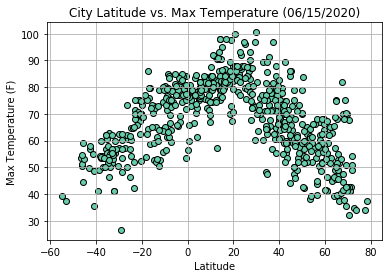

The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.


In [14]:
converted_dates = []
for date in dates:
    converted_date = datetime.datetime.fromtimestamp(date).strftime("%m/%d/%Y")
    converted_dates.append(converted_date)
    
weather_reports["Converted Date"] = converted_dates
weather_reports = weather_reports[["City", 
                                   "Cloudiness", 
                                   "Country", 
                                   "Date", 
                                   "Converted Date", 
                                   "Humidity", 
                                   "Lat", 
                                   "Lng", 
                                   "Max Temp", 
                                   "Wind Speeds"]]
plot_date = weather_reports.loc[0, "Converted Date"]
plt.scatter(weather_reports["Lat"], weather_data["Max Temp"], facecolor="#66CDAA", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Images/figure_1.png', dpi=100)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.")


#### Latitude vs. Humidity Plot

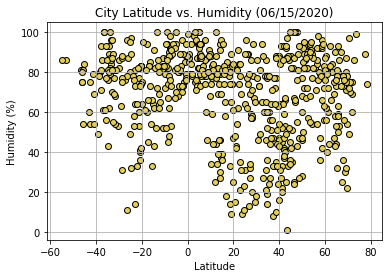

The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.


In [15]:
plt.scatter(weather_reports["Lat"], weather_data["Humidity"], facecolor="#E3CF57", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Images/figure_2.png', dpi=100)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.")

#### Latitude vs. Cloudiness Plot

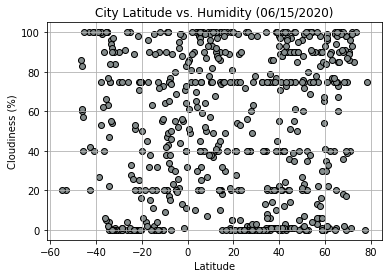

The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.


In [16]:
plt.scatter(weather_reports["Lat"], weather_data["Cloudiness"], facecolor="#838B8B", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Images/figure_3.png', dpi=100)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.")

#### Latitude vs. Wind Speed Plot

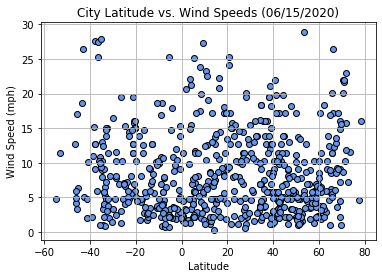

The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.


In [17]:
plt.scatter(weather_reports["Lat"], weather_data["Wind Speeds"], facecolor="#6495ED", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speeds ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Images/figure_4.png', dpi=100)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.")

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames


# Northern DF
northern_df = weather_reports.loc[weather_reports["Lat"] > 0,:]
northern_df.head()


,City,Cloudiness,Country,Date,Converted Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
5,severo-yeniseyskiy,35,RU,1592263380,06/15/2020,88,60.37,93.04,41.59,3.40
6,albany,24,US,1592263380,06/15/2020,53,42.60,-73.97,75.00,2.84
8,kapaa,20,US,1592263101,06/15/2020,62,22.08,-159.32,84.20,14.99
10,georgetown,40,MY,1592263381,06/15/2020,94,5.41,100.34,82.00,2.24
11,lagoa,45,PT,1592263381,06/15/2020,88,39.05,-27.98,64.09,18.25


In [19]:
# Southern DF
southern_df = weather_reports.loc[weather_reports["Lat"] < 0,:]
southern_df.head()

,City,Cloudiness,Country,Date,Converted Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,saint-philippe,71,RE,1592263379,06/15/2020,82,-21.36,55.77,68.00,11.41
1,punta arenas,20,CL,1592263124,06/15/2020,86,-53.15,-70.92,37.40,11.41
2,copiapo,91,CL,1592263304,06/15/2020,76,-27.37,-70.33,57.20,6.93
3,avarua,25,CK,1592263380,06/15/2020,53,-21.21,-159.78,75.20,11.41
4,karratha,0,AU,1592263380,06/15/2020,40,-20.74,116.85,67.62,16.08


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

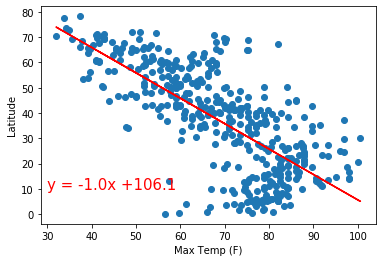

In [20]:
# Set X and Y vals
x_values = northern_df["Max Temp"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="red")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_5.png', dpi=100)
plt.show()





####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

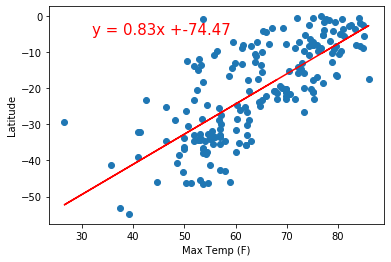

In [21]:
# Set X and Y vals
x_values = southern_df["Max Temp"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(32,-5),fontsize=15,color="red")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_6.png', dpi=100)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

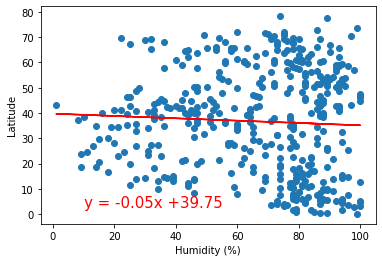

In [22]:
# Set X and Y vals
x_values = northern_df["Humidity"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,3),fontsize=15,color="red")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_7.png', dpi=100)
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

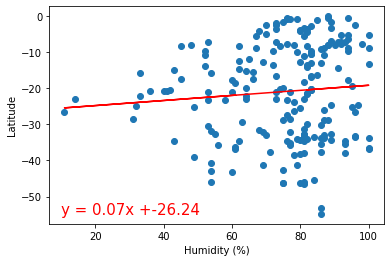

In [23]:
# Set X and Y vals
x_values = southern_df["Humidity"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,-55),fontsize=15,color="red")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_8.png', dpi=100)
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

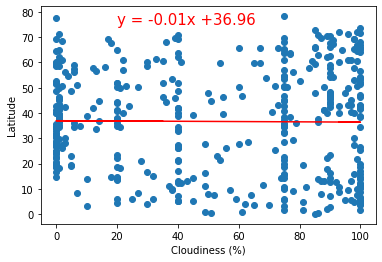

In [24]:
# Set X and Y vals
x_values = northern_df["Cloudiness"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,75),fontsize=15,color="red")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_9.png', dpi=100)
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

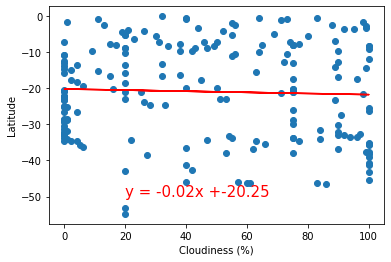

In [25]:
# Set X and Y vals
x_values = southern_df["Cloudiness"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig('Images/figure_10.png', dpi=100)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

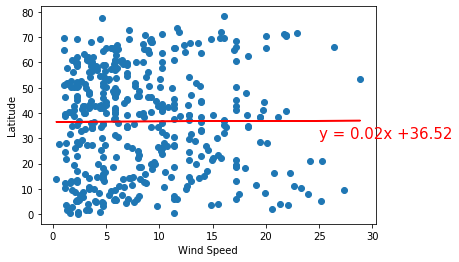

In [26]:
# Set X and Y vals
x_values = northern_df["Wind Speeds"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(25,30),fontsize=15,color="red")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig('Images/figure_11.png', dpi=100)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

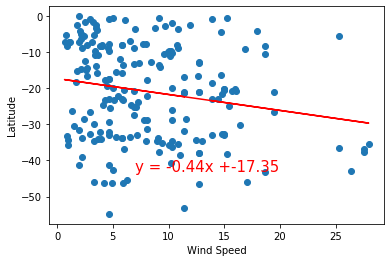

In [27]:
# Set X and Y vals
x_values = southern_df["Wind Speeds"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(7,-43),fontsize=15,color="red")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig('Images/figure_12.png', dpi=100)
plt.show()